### Essential libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ml_utils as mu
from sklearn.model_selection import train_test_split

- Reading the raw data and storing it in a dataframe

In [3]:
%time
path = "../data/housing.csv"
df = pd.read_csv(path)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs


- Taking a quick glance at the dataframe

In [4]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12353,-116.54,33.81,24.0,6087.0,1217.0,1721.0,833.0,3.1493,199400.0,INLAND
13738,-117.21,34.05,4.0,2904.0,764.0,1250.0,664.0,3.2131,137500.0,INLAND
8205,-118.16,33.78,33.0,2048.0,585.0,2074.0,597.0,2.0156,152700.0,NEAR OCEAN
2854,-118.95,35.38,30.0,2594.0,478.0,1419.0,480.0,3.7250,83100.0,INLAND
14041,-117.14,32.75,27.0,1551.0,464.0,880.0,400.0,2.4167,131300.0,NEAR OCEAN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- There are some missing values in the dataset

In [6]:
total_bed_na = df.query('total_bedrooms.isna()')
total_bed_na

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


- Since there are only a few missing values in a single column, I'll use the forward fill method to fill in the null values

In [7]:
df['total_bedrooms'] = df['total_bedrooms'].ffill()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Alright, everything looks good now

- Let's start with the train-test split

In [9]:
X = df.drop(['median_house_value'], axis='columns') # Data without the target
y = df['median_house_value'] # Target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

- The new dataframe that will be utilized

In [11]:
train_data = mu.preprocess_data(X_train.join(y_train))
test_data = mu.preprocess_data(X_test.join(y_test))

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
18933,-122.15,38.29,17.0,7.393878,5.480639,6.556778,5.416100,6.5891,328800.0,0,0,0,1,0,0.741240,1.365166
4347,-118.35,34.11,33.0,8.919854,7.425954,7.901748,7.313887,4.1717,500001.0,1,0,0,0,0,0.832520,1.219578
6624,-118.14,34.17,52.0,7.889084,6.188264,7.427739,6.224558,4.0524,173100.0,1,0,0,0,0,0.784408,1.267413
16859,-122.42,37.64,41.0,4.595120,3.044522,4.234107,2.995732,2.2250,212500.0,0,0,0,0,1,0.662556,1.533889
16778,-122.47,37.68,31.0,8.313362,6.656727,7.841886,6.605298,4.5337,306700.0,0,0,0,0,1,0.800726,1.258590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11516,-118.06,33.72,17.0,8.428143,6.843750,7.390181,6.680855,5.7704,500001.0,0,0,0,0,1,0.812012,1.261537
5525,-118.37,33.97,32.0,8.809863,7.485492,7.910591,7.342779,3.3889,285700.0,1,0,0,0,0,0.849672,1.199800
18369,-121.90,37.16,43.0,7.333023,5.743003,6.347389,5.525453,5.2366,293300.0,1,0,0,0,0,0.783170,1.327135
17664,-121.89,37.27,28.0,7.301148,5.549076,6.535241,5.402677,5.2088,240900.0,1,0,0,0,0,0.760028,1.351394


In [13]:
train_corr = train_data.corr(numeric_only=True)

### Plotting graphs

- Let's plot some graphs to visualize some data characteristics. 

- Plotting a heatmap and histograms for relevant columns

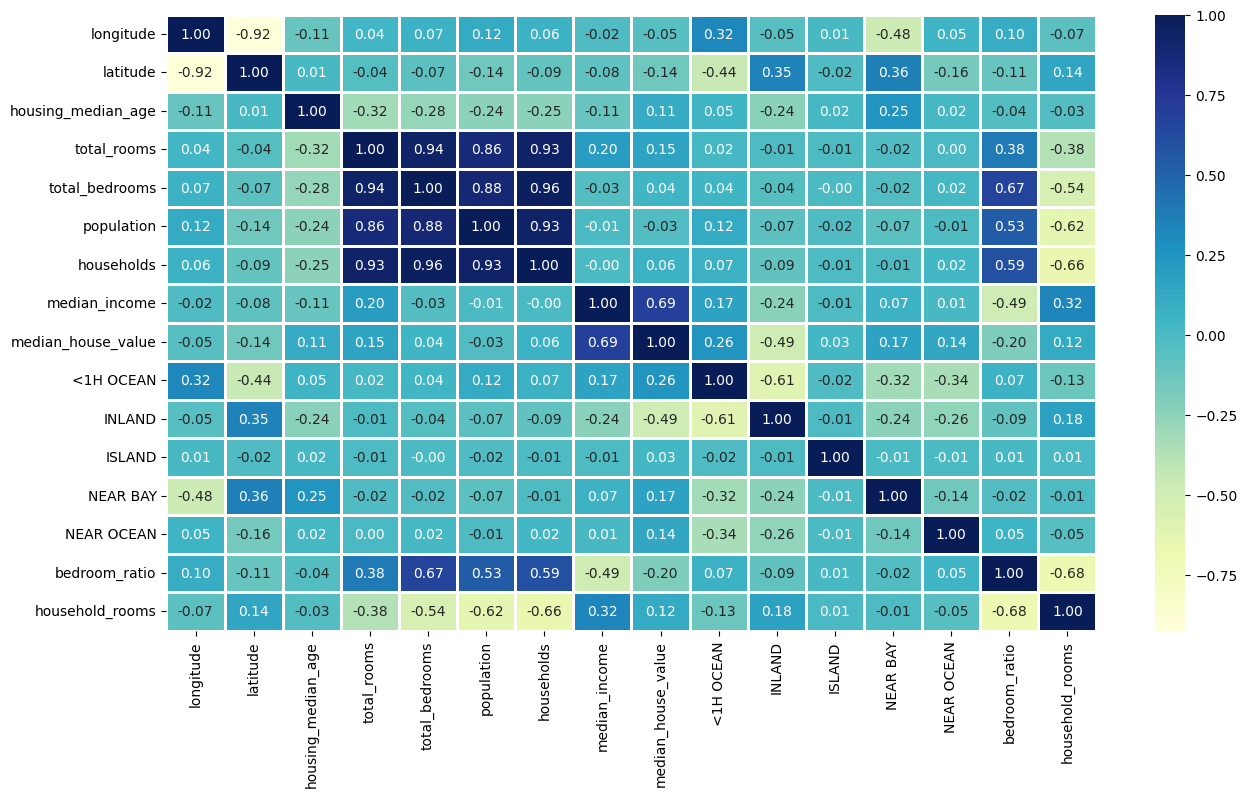

In [14]:
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(train_corr, annot=True, linewidths=1, ax=ax, cmap='YlGnBu', fmt=".2f")
plt.show()

#### Population Histogram

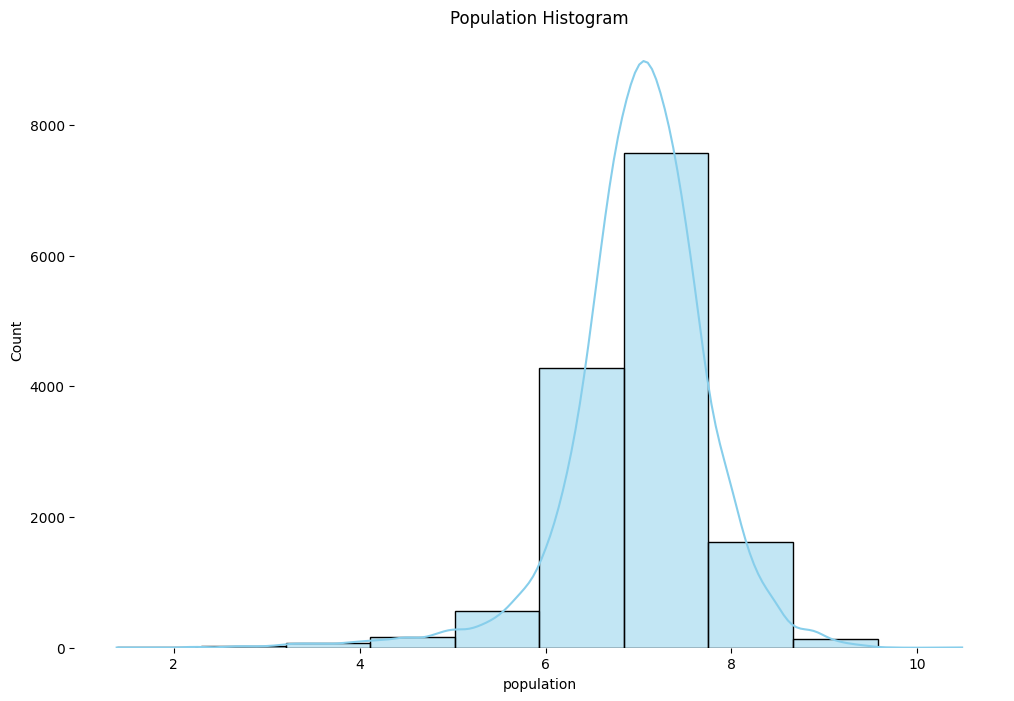

In [35]:
f, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=train_data, x='population', kde=True, color='skyblue', bins=10).set(title='Population Histogram')
sns.despine(bottom=True, left=True)
plt.show()

- A normal concentration of values between 6 and 8.

#### Housing Median Age Histogram

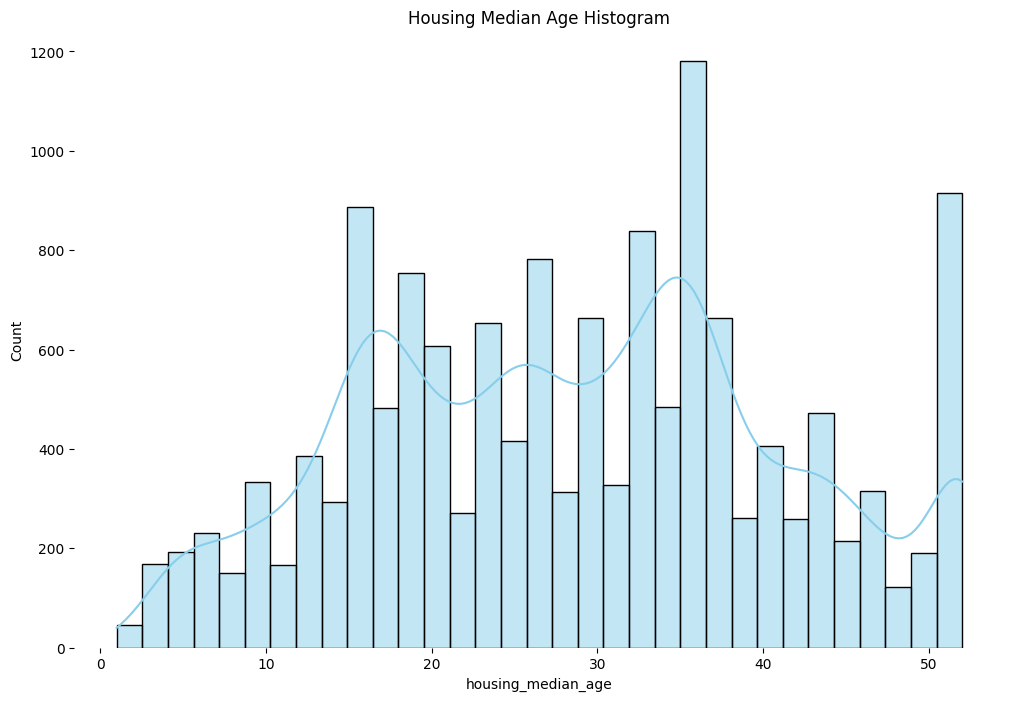

In [34]:
f, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=train_data, x='housing_median_age', kde=True, color='skyblue').set(title='Housing Median Age Histogram')
sns.despine(bottom=True, left=True)
plt.show()

- The values are well distributed without a clear definition

#### Median Income Histogram

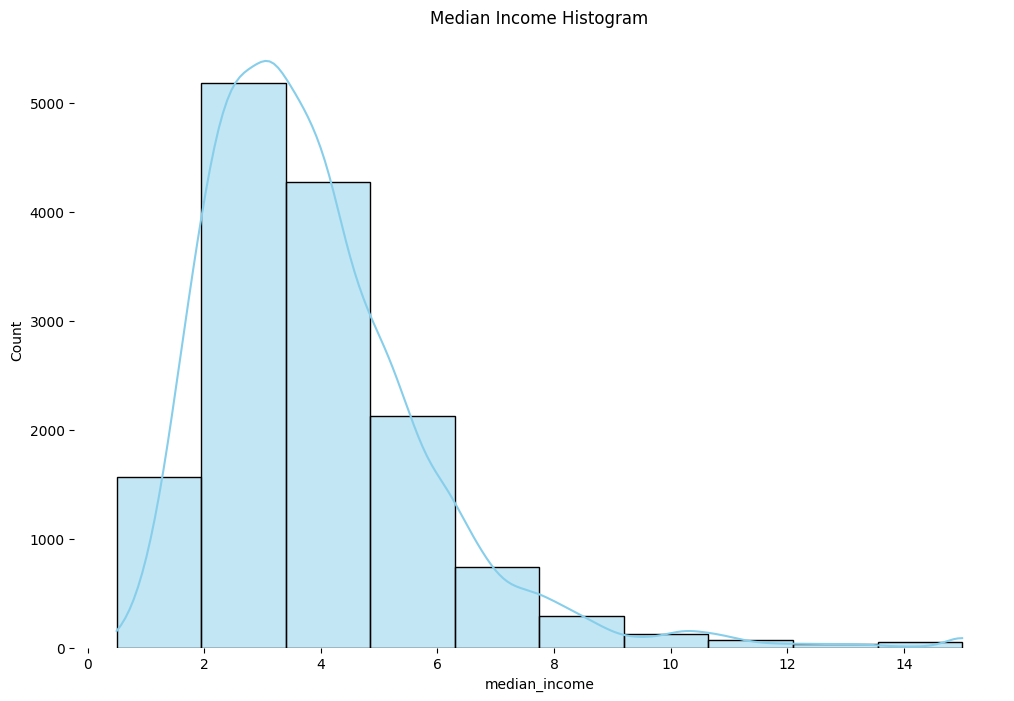

In [36]:
f, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=train_data, x='median_income', kde=True, color='skyblue', bins=10).set(title='Median Income Histogram')
sns.despine(bottom=True, left=True)
plt.show()

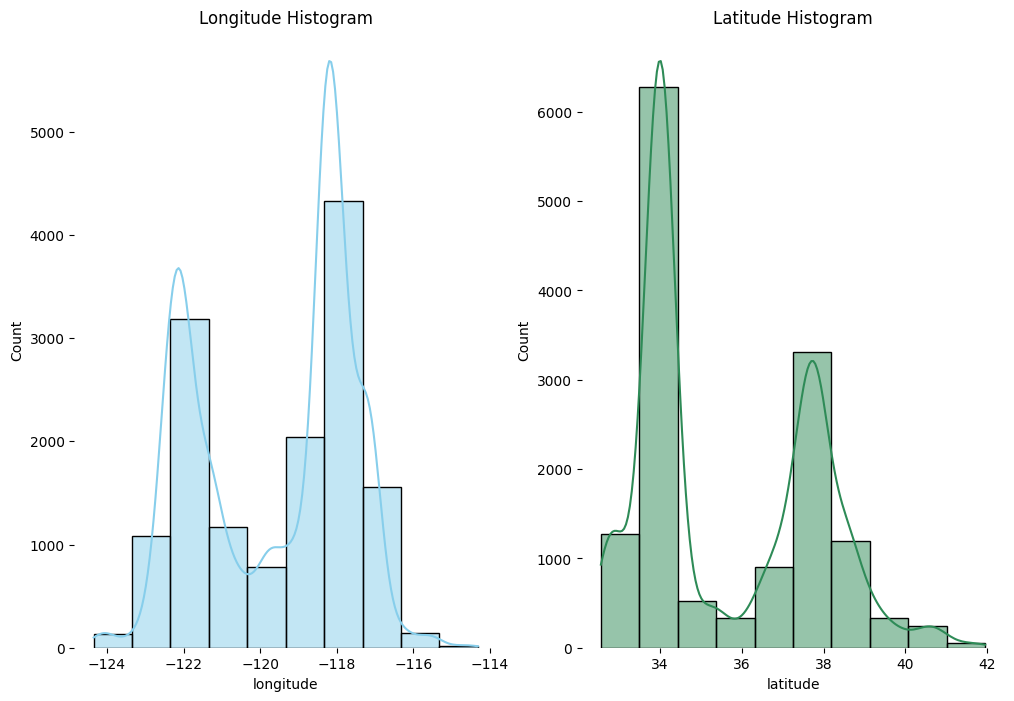

In [45]:
f, ax = plt.subplots(1, 2, figsize=(12, 8))
sns.histplot(data=train_data, x='longitude', kde=True, color='skyblue', bins=10, ax=ax[0]).set(title='Longitude Histogram')
sns.histplot(data=train_data, x='latitude', kde=True, color='seagreen', bins=10, ax=ax[1]).set(title='Latitude Histogram')
sns.despine(bottom=True, left=True)
plt.show()

- Exploring some columns to identify any patterns or relevant insights.

In [ ]:
train_data['median_income'].describe().round(2)

count    14448.00
mean         3.87
std          1.90
min          0.50
25%          2.57
50%          3.53
75%          4.75
max         15.00
Name: median_income, dtype: float64

In [ ]:
train_data['housing_median_age'].describe().round(2)

count    14448.00
mean        28.63
std         12.58
min          1.00
25%         18.00
50%         29.00
75%         37.00
max         52.00
Name: housing_median_age, dtype: float64

In [ ]:
train_data['population'].describe().round(2)

count    14448.00
mean         7.02
std          0.74
min          1.79
25%          6.67
50%          7.06
75%          7.45
max          9.70
Name: population, dtype: float64

#### Scaterplot

- Plotting a scatterplot to see if `longitude` and `latitude` influence the housing prices

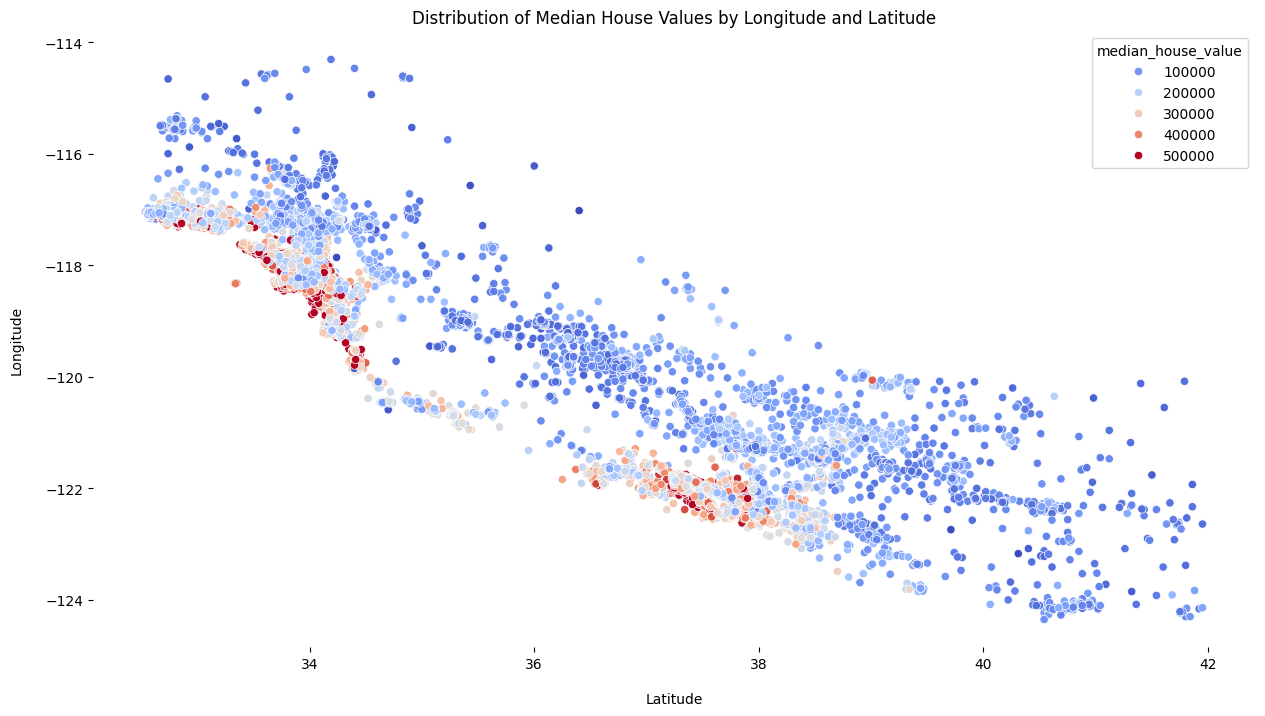

In [ ]:
f, ax = plt.subplots(figsize=(15, 8))

sns.scatterplot(data=train_data, x='latitude', y='longitude', ax=ax, hue='median_house_value', palette='coolwarm')

ax.set_title('Distribution of Median House Values by Longitude and Latitude')
ax.set_xlabel(xlabel='Latitude', labelpad=15)
ax.set_ylabel(ylabel='Longitude', labelpad=15)
sns.despine(left=True, bottom=True)

plt.show()

- It has the shape of a negative linear function

- Plotting a scatterplot to observe the potential influence of `population` and `total_rooms` on housing prices

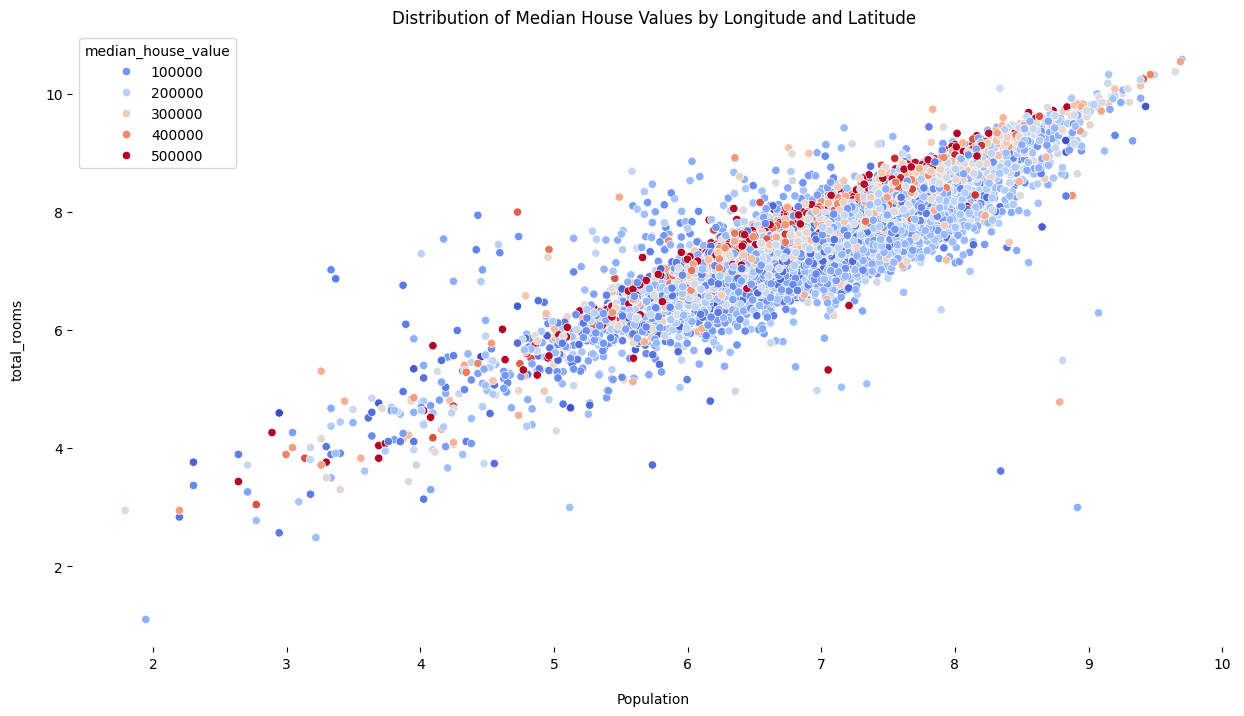

In [ ]:
f, ax = plt.subplots(figsize=(15, 8))

sns.scatterplot(data=train_data, x='population', y='total_rooms', ax=ax, hue='median_house_value', palette='coolwarm')

ax.set_title('Distribution of Population by Total of rooms')
ax.set_xlabel(xlabel='Population', labelpad=15)
ax.set_ylabel(ylabel='total_rooms', labelpad=15)
sns.despine(left=True, bottom=True)

plt.show()

- It has the shape of a linear function

### Save the data in format CSV

In [ ]:
train_data.to_csv('../data/train.csv')
test_data.to_csv('../data/test.csv')